In [1]:
if not "working_directory_corrected" in vars():
    %cd ..
    working_directory_corrected = True

c:\Users\joshu\Desktop\lms


# Neural Net Bigrams
- same approach as with the pure bigram model based on the probabilities of the data set, this time with a neural net with gradient based optimization
- idea is to predict a probability distribution based on the last character to find the new character
- the model is trained on list of names with the average negative log likelihood loss function established in the previous bigram model
- the label for each data point will be the next character

In [38]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [20]:
names = open("data/names.txt").read().splitlines()
len(names)

32033

In [30]:
chars = ["."] + sorted(list(set("".join(names))))
char2idx = {c: i for i, c in enumerate(chars)}
idx2char = {i: c for c, i in char2idx.items()}

In [31]:
# training set

xs, ys = [], []

for name in names[:1]:
    chrs = ["."] + list(name) + ["."]
    for ch1, ch2 in zip(chrs, chrs[1:]):
        idx1 = char2idx[ch1]
        idx2 = char2idx[ch2]
        print(ch1, ch2)
        xs.append(idx1)
        ys.append(idx2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [25]:
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [45]:
x_enc = F.one_hot(xs, num_classes=27).float() # casting to float so nn can work with it
x_enc.shape

torch.Size([5, 27])

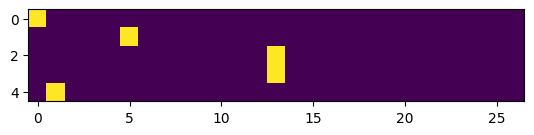

In [48]:
plt.imshow(x_enc)

In [61]:
x_enc, torch.randn((27, 1))

(tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 tensor([[-1.0233],
         [ 0.6966],
         [ 0.2599],
         [-0.6688],
         [ 0.5313],
         [ 1.4865],
         [ 1.6403],
         [ 0.3220],
         [-1.1828],
         [-1.4430],
         [ 0.8453],
         [ 0.9677],
         [-1.3930],
         [ 0.3996],
         [ 1.7170],
         [-0.1110],
         [ 0.0720],
         [-1.

In [62]:
# initializing weights
# doing matrix multiplication with the encoded x's (batch of multiple)
# this will feed in all x's into every neuron at the same time, pytorch can do this in parallel

# x_enc (5, 27) @ weights (27, 1) -> (5, 1)

W = torch.randn((27, 1)) # -> one neuron, 27 inputs, one for each possible character
x_enc @ W # returns (5, 1) for 5 input x's, one activation which is dot product between the encoded x and the weights

tensor([[-0.3634],
        [ 1.5080],
        [ 0.3771],
        [ 0.3771],
        [ 0.6264]])

In [63]:
# x_enc (5, 27) @ weights (27, 27) -> (5, 27)
# same but with 27 neurons

W = torch.randn((27, 27))
x_enc @ W

tensor([[ 0.8228, -0.9996,  1.9027, -0.4031, -0.7423,  1.4252, -0.5842, -0.4163,
          1.5283, -0.2163, -0.1250, -1.5076,  1.6666, -1.6918,  1.8165,  1.5119,
          0.3403,  0.7355, -0.2298, -0.0905, -1.5814, -0.8590,  2.0835,  3.0896,
          0.3318, -0.4650, -0.2678],
        [ 0.8312, -0.9745,  1.1119, -0.5773,  0.5229,  0.5173,  0.2952, -0.3793,
          0.3359, -0.3278, -0.0929, -0.5624, -0.4958, -0.4486,  0.0507,  0.8394,
          1.5801,  0.5118, -0.1296,  0.9709,  0.4635, -0.6258,  0.7603, -0.6295,
         -0.0763, -0.8423,  1.6255],
        [-0.1843,  0.2023, -1.2605, -1.4261,  0.0299, -0.0031,  0.1388,  0.7102,
         -0.6734, -0.9918,  0.4269, -0.1277, -0.6256,  0.2464, -0.5267,  2.3556,
         -1.1540,  0.1705, -0.0199,  0.2666, -0.9382, -1.0278, -0.9612,  0.9282,
         -0.4368, -1.4513, -0.6967],
        [-0.1843,  0.2023, -1.2605, -1.4261,  0.0299, -0.0031,  0.1388,  0.7102,
         -0.6734, -0.9918,  0.4269, -0.1277, -0.6256,  0.2464, -0.5267,  2.3556

In [64]:
(x_enc @ W).shape

torch.Size([5, 27])

In [66]:
(x_enc @ W)[3, 13] # 3rd x, 13th neuron

tensor(0.2464)

In [67]:
# W has weights in columns, each col is a neuron
# input has same number of columns as number of rows in W -> each row in x_enc is dotted with each row in W

In [68]:
x_enc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [70]:
W[13]

tensor([-0.1843,  0.2023, -1.2605, -1.4261,  0.0299, -0.0031,  0.1388,  0.7102,
        -0.6734, -0.9918,  0.4269, -0.1277, -0.6256,  0.2464, -0.5267,  2.3556,
        -1.1540,  0.1705, -0.0199,  0.2666, -0.9382, -1.0278, -0.9612,  0.9282,
        -0.4368, -1.4513, -0.6967])

In [71]:
(x_enc[3] * W[:, 13]).sum()

tensor(0.2464)

In [88]:
# we need something interpretable from the model
# going back to the matrix of counts and then probs we had in the other bigram model
# we make 27 neurons each getting 27 inputs from the one hot encoded character

(x_enc @ W).exp() # exponentiate to make values negative between 0 and 1 and positive more positive<

tensor([[ 2.2768,  0.3680,  6.7040,  0.6683,  0.4760,  4.1587,  0.5575,  0.6595,
          4.6104,  0.8055,  0.8825,  0.2214,  5.2943,  0.1842,  6.1506,  4.5353,
          1.4053,  2.0865,  0.7947,  0.9135,  0.2057,  0.4236,  8.0329, 21.9681,
          1.3934,  0.6281,  0.7650],
        [ 2.2961,  0.3774,  3.0401,  0.5614,  1.6870,  1.6774,  1.3435,  0.6843,
          1.3991,  0.7205,  0.9113,  0.5699,  0.6091,  0.6385,  1.0520,  2.3150,
          4.8555,  1.6683,  0.8784,  2.6404,  1.5897,  0.5348,  2.1388,  0.5328,
          0.9266,  0.4307,  5.0812],
        [ 0.8317,  1.2242,  0.2835,  0.2402,  1.0303,  0.9969,  1.1489,  2.0344,
          0.5100,  0.3709,  1.5325,  0.8801,  0.5349,  1.2794,  0.5906, 10.5446,
          0.3154,  1.1859,  0.9803,  1.3055,  0.3913,  0.3578,  0.3824,  2.5301,
          0.6461,  0.2343,  0.4982],
        [ 0.8317,  1.2242,  0.2835,  0.2402,  1.0303,  0.9969,  1.1489,  2.0344,
          0.5100,  0.3709,  1.5325,  0.8801,  0.5349,  1.2794,  0.5906, 10.5446

In [91]:
(x_enc @ W).exp().shape

torch.Size([5, 27])

In [90]:
logits = x_enc @ W # log counts
counts = logits.exp() # equivalent to counts matrix we had in other bigram model
probs = counts / counts.sum(1, keepdims=True) # normalize again across columns to get probs
# => this is a softmax activation function
# > allows to take in positive and negative numbers from a previous layer and makes them into a probability distribution
#   with numbers between 0 and 1 and that sums to 1
probs

tensor([[0.0295, 0.0048, 0.0869, 0.0087, 0.0062, 0.0539, 0.0072, 0.0085, 0.0597,
         0.0104, 0.0114, 0.0029, 0.0686, 0.0024, 0.0797, 0.0588, 0.0182, 0.0270,
         0.0103, 0.0118, 0.0027, 0.0055, 0.1041, 0.2847, 0.0181, 0.0081, 0.0099],
        [0.0558, 0.0092, 0.0739, 0.0136, 0.0410, 0.0408, 0.0326, 0.0166, 0.0340,
         0.0175, 0.0221, 0.0138, 0.0148, 0.0155, 0.0256, 0.0562, 0.1180, 0.0405,
         0.0213, 0.0642, 0.0386, 0.0130, 0.0520, 0.0129, 0.0225, 0.0105, 0.1235],
        [0.0253, 0.0373, 0.0086, 0.0073, 0.0314, 0.0303, 0.0350, 0.0619, 0.0155,
         0.0113, 0.0466, 0.0268, 0.0163, 0.0389, 0.0180, 0.3209, 0.0096, 0.0361,
         0.0298, 0.0397, 0.0119, 0.0109, 0.0116, 0.0770, 0.0197, 0.0071, 0.0152],
        [0.0253, 0.0373, 0.0086, 0.0073, 0.0314, 0.0303, 0.0350, 0.0619, 0.0155,
         0.0113, 0.0466, 0.0268, 0.0163, 0.0389, 0.0180, 0.3209, 0.0096, 0.0361,
         0.0298, 0.0397, 0.0119, 0.0109, 0.0116, 0.0770, 0.0197, 0.0071, 0.0152],
        [0.0252, 0.0221,

In [87]:
probs.shape # we get a matrix with 5 

torch.Size([5, 27])

In [86]:
probs[0].sum()

tensor(1.)

In [105]:
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    print("- - - - - -")
    print(f"bigram: {idx2char[x]}, {idx2char[y]} at {x}, y")
    print(f"input: {x}")
    print(f"output: {probs[i]}")
    print(f"actual: {y}")
    prob = probs[i, y]
    print(f"prob by nn: {prob}")
    logp = torch.log(prob)
    print(f"log likelihood : {logp}")
    nll = -logp
    print(f"negative log likelihood: {nll}")
    nlls[i] = nll

print("======")
print("average nll/loss = ", nlls.mean().item())

- - - - - -
bigram: ., e at 0, y
input: 0
output: tensor([0.0295, 0.0048, 0.0869, 0.0087, 0.0062, 0.0539, 0.0072, 0.0085, 0.0597,
        0.0104, 0.0114, 0.0029, 0.0686, 0.0024, 0.0797, 0.0588, 0.0182, 0.0270,
        0.0103, 0.0118, 0.0027, 0.0055, 0.1041, 0.2847, 0.0181, 0.0081, 0.0099])
actual: 5
prob by nn: 0.05389027297496796
log likelihood : -2.9208052158355713
negative log likelihood: 2.9208052158355713
- - - - - -
bigram: e, m at 5, y
input: 5
output: tensor([0.0558, 0.0092, 0.0739, 0.0136, 0.0410, 0.0408, 0.0326, 0.0166, 0.0340,
        0.0175, 0.0221, 0.0138, 0.0148, 0.0155, 0.0256, 0.0562, 0.1180, 0.0405,
        0.0213, 0.0642, 0.0386, 0.0130, 0.0520, 0.0129, 0.0225, 0.0105, 0.1235])
actual: 13
prob by nn: 0.01551350299268961
log likelihood : -4.166044235229492
negative log likelihood: 4.166044235229492
- - - - - -
bigram: m, m at 13, y
input: 13
output: tensor([0.0253, 0.0373, 0.0086, 0.0073, 0.0314, 0.0303, 0.0350, 0.0619, 0.0155,
        0.0113, 0.0466, 0.0268, 0.0163, 0

## Optimization

In [106]:
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [141]:
W = torch.randn((27, 27), requires_grad=True)

### Forward pass

In [147]:
xenc = F.one_hot(xs, num_classes=27).float() # input to nn, one hot encoding
logits = x_enc @ W # predict log counts
counts = logits.exp() # counts equivalent to N in other bigram model
probs = counts / counts.sum(1, keepdim=True) # probabilities for next character

In [148]:
probs[torch.arange(5), ys] # probabilities for the next characters for each input character

tensor([0.0268, 0.0802, 0.1136, 0.0294, 0.0155], grad_fn=<IndexBackward0>)

In [149]:
loss = -probs[torch.arange(5), ys].log().mean()
loss.item()

3.202836513519287

### Backward pass

In [145]:
W.grad = None # set the gradients to 0
loss.backward() # calculate the gradients

In [146]:
W.data += -0.1 * W.grad

### Repeat

In [159]:
# training set
xs, ys = [], []

for name in names: # use all names this time
    chrs = ["."] + list(name) + ["."]
    for ch1, ch2 in zip(chrs, chrs[1:]):
        idx1 = char2idx[ch1]
        idx2 = char2idx[ch2]
        xs.append(idx1)
        ys.append(idx2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
num

228146

In [166]:
W = torch.randn((27, 27), requires_grad=True)

losses = []
for k in range(100):

    # forward
    x_enc = F.one_hot(xs, num_classes=27).float()
    logits = x_enc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() # loss + regularization (see model smoothing in other bigrams)

    # backward
    W.grad = None
    loss.backward()

    # update
    W.data += -50 * W.grad

    print(f"{k}: {loss.item()}")
    losses.append(loss.item())

0: 3.8021247386932373
1: 3.4208505153656006
2: 3.202785015106201
3: 3.054253339767456
4: 2.9474921226501465
5: 2.867751359939575
6: 2.8077304363250732
7: 2.7623510360717773
8: 2.727447748184204
9: 2.6998727321624756
10: 2.6774744987487793
11: 2.65885329246521
12: 2.643097162246704
13: 2.62959361076355
14: 2.6179041862487793
15: 2.60770320892334
16: 2.5987367630004883
17: 2.5908045768737793
18: 2.583744764328003
19: 2.5774283409118652
20: 2.5717477798461914
21: 2.566615104675293
22: 2.5619583129882812
23: 2.5577166080474854
24: 2.5538387298583984
25: 2.550281047821045
26: 2.5470077991485596
27: 2.5439865589141846
28: 2.5411901473999023
29: 2.5385959148406982
30: 2.5361826419830322
31: 2.533933162689209
32: 2.5318315029144287
33: 2.52986478805542
34: 2.528020143508911
35: 2.5262868404388428
36: 2.524656295776367
37: 2.5231192111968994
38: 2.5216686725616455
39: 2.5202977657318115
40: 2.519000291824341
41: 2.517770528793335
42: 2.516603708267212
43: 2.515495777130127
44: 2.514441967010498

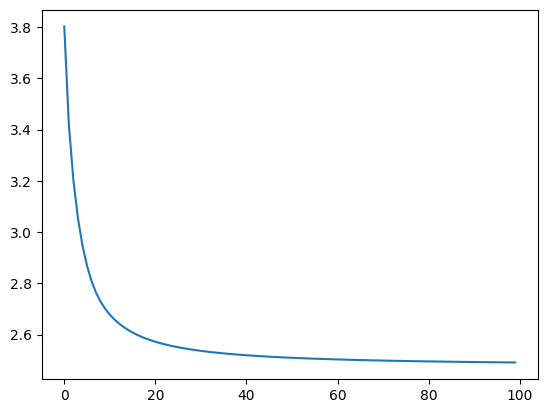

In [167]:
plt.plot(losses)

- this gets quite close to the manual approach before, this time with gradient based learning
- makes sense that it's not better because there is no additional information
- easier here to keep them in a table, gradient based is much more flexible in how it can be expanded

- only thing that will fundamentally change is how we get logits. we can in more information here

In [173]:
for i in range(10):

    out = []
    ix = 0
    while True:
        x_enc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = x_enc @ W
        counts = logits.exp()
        probs = counts / counts.sum(1, keepdim=True)

        ix = torch.multinomial(probs, num_samples=1, replacement=True).item()
        out.append(idx2char[ix])
        if ix == 0:
            break
    print("".join(out))

e.
yayashusha.
sia.
ma.
kaha.
rer.
kj.
klinditigfl.
aryza.
tene.
